In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

In [2]:
# Load data
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

In [3]:
# 7000 data with 300 features
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(7000, 300)
(7000,)
(3000, 300)


In [4]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


# Q1

In [5]:
def cross_validation(x_train, y_train, k=5, shuffle=True):
    
    # Do not modify the function name and always take 'x_train, y_train, k' as the inputs.
    # TODO HERE
    
    indices = np.arange(len(x_train))
    if shuffle :
        np.random.seed(42)
        np.random.shuffle(indices)
        
    fold_size = len(x_train) // k

    kfold_data = []

    for i in range(k):
        val_indices = indices[i*fold_size:(i+1)*fold_size]
        train_indices = np.concatenate([indices[:i*fold_size], indices[(i+1)*fold_size:]])

        kfold_data.append((train_indices, val_indices))
    
    kfold_data = np.array(kfold_data)

    return kfold_data

In [6]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K

# K-Fold Example

In [7]:
from sklearn.model_selection import KFold

X = np.arange(20)

kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 1  3  4  5  6  7  9 10 11 12 13 14 15 16 18 19], Validation index: [ 0  2  8 17]
Split: 2, Training index: [ 0  1  2  3  4  5  7  8  9 11 12 13 15 17 18 19], Validation index: [ 6 10 14 16]
Split: 3, Training index: [ 0  2  3  6  7  8  9 10 11 12 14 15 16 17 18 19], Validation index: [ 1  4  5 13]
Split: 4, Training index: [ 0  1  2  3  4  5  6  7  8 10 13 14 15 16 17 19], Validation index: [ 9 11 12 18]
Split: 5, Training index: [ 0  1  2  4  5  6  8  9 10 11 12 13 14 16 17 18], Validation index: [ 3  7 15 19]


In [8]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Q2

In [9]:
# (Example) Using SVC from sklearn

clf = SVC(C=1.0, gamma=0.01, kernel='rbf', class_weight='balanced')

In [11]:
x_train = (x_train - np.average(x_train)) / (np.std(x_train))
x_test = (x_test - np.average(x_test)) / (np.std(x_test))

In [12]:
best_c, best_gamma = None, None

# TODO HERE
# k-Flod Cross Validation and Grid Search

def k_fold_cross_val_score(X, y, model, k=5):
       
    n_samples = X.shape[0]
    fold_size = n_samples // k
    
    indices = np.arange(n_samples)
    np.random.seed(0)
    np.random.shuffle(indices)
    
    X = X[indices]
    y = y[indices]
    
    scores = []
    for i in range(k):
        start, end = i*fold_size, (i+1)*fold_size
        X_val, y_val = X[start:end], y[start:end]
        X_train, y_train = np.concatenate([X[:start], X[end:]]), np.concatenate([y[:start], y[end:]])
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        acc = accuracy_score(y_val, y_pred)
        scores.append(acc)
    
    return np.mean(scores)

# Define the hyperparameters and their possible values
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
k = 5
best_score = -np.inf
scores = np.zeros((len(param_grid['C']), len(param_grid['gamma'])))

# Perform Grid Search to find the best hyperparameters and scores
for i, c in enumerate(param_grid['C']):
    for j, gamma in enumerate(param_grid['gamma']):
        svm = SVC(C=c, gamma=gamma, kernel='rbf', class_weight='balanced')
        score = k_fold_cross_val_score(x_train, y_train, svm, k=k)
        print(c, gamma, score)
        scores[i, j] = score
        
        if score > best_score:
            best_c = c
            best_gamma = gamma
            best_score = score

# Perform Grid Search to find the best hyperparameters
# best_params, best_score, all_score = grid_search(x_train, y_train, clf, param_grid, k=5)

# best_c, best_gamma = best_params['C'], best_params['gamma']

best_parameters = (best_c, best_gamma)

0.01 0.001 0.5032857142857143
0.01 0.01 0.5032857142857143
0.01 0.1 0.5032857142857143
0.01 1 0.5032857142857143
0.01 10 0.5032857142857143
0.01 100 0.5032857142857143
0.1 0.001 0.9397142857142857
0.1 0.01 0.5018571428571429
0.1 0.1 0.5018571428571429
0.1 1 0.5018571428571429
0.1 10 0.5018571428571429
0.1 100 0.5018571428571429
1 0.001 0.9731428571428571
1 0.01 0.9848571428571429
1 0.1 0.4967142857142857
1 1 0.4967142857142857
1 10 0.4967142857142857
1 100 0.4967142857142857
10 0.001 0.9887142857142857
10 0.01 0.9854285714285714
10 0.1 0.4967142857142857
10 1 0.4967142857142857
10 10 0.4967142857142857
10 100 0.4967142857142857
100 0.001 0.9880000000000001
100 0.01 0.9854285714285714
100 0.1 0.4967142857142857
100 1 0.4967142857142857
100 10 0.4967142857142857
100 100 0.4967142857142857


In [13]:
print("(best_c, best_gamma) is ", best_parameters)

(best_c, best_gamma) is  (10, 0.001)


# Q3

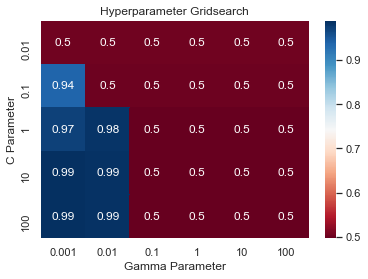

In [14]:
# Plot the grid search results of your SVM

# TODO HERE
# Plot the results as a heatmap

sns.set()
sns.heatmap(scores, annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='RdBu')
plt.xlabel('Gamma Parameter')
plt.ylabel('C Parameter')
plt.title('Hyperparameter Gridsearch')
plt.show()

## Q4

In [15]:
# Do Not Modify Below

best_model = SVC(C=best_parameters[0], gamma=best_parameters[1], kernel='rbf')
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

print("Accuracy score: ", accuracy_score(y_pred, y_test))

# If your accuracy here > 0.9 then you will get full credit (20 points).

Accuracy score:  0.988
